In [1]:
from curtsies.fmtfuncs import red, bold, green, on_blue, yellow, blue, cyan
from transformers import GPT2Config, GPT2LMHeadModel, GPT2Tokenizer
import os

NEWLINECHAR = '<N>'

def encode_newlines(inp):
    return inp.replace('\n', NEWLINECHAR)
def decode_newlines(inp):
    return inp.replace(NEWLINECHAR, '\n')

tokenizer = GPT2Tokenizer.from_pretrained("tokenizer")
tokenizer.add_special_tokens({
    "eos_token": '</s>',
    "bos_token": '<s>',
    "unk_token": '<unk>',
    "pad_token": '<pad>',
    "mask_token": '<mask>'
})


model = GPT2LMHeadModel.from_pretrained("model").to('cuda') # type: ignore

2023-08-23 14:00:32.351191: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-23 14:00:32.820260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
def auto_complete(inp):
    inp = encode_newlines(inp)
    new_line_count = inp.count(NEWLINECHAR)
    
    input_ids = tokenizer.encode(inp, return_tensors='pt').to('cuda')

    model_out = model.generate(
        input_ids,
        max_length = 200,
        num_beams = 10,
        temperature = 1,
        no_repeat_ngram_size = 5,
        num_return_sequences = 3,
        return_dict_in_generate = True,
        output_scores = True
        )
    
    sequences = model_out["sequences"] # type: ignore
    # decoded = decode_newlines(tokenizer.decode(sequence))
    
    # print('-' * 20 + '\n', decoded, '\n' + '-' * 20 )

    auto_complete = ""
    for sequence in sequences:
        decoded = decode_newlines(tokenizer.decode(sequence))
        print('-' * 20 + '\n', decoded, '\n' + '-' * 20 )
        split = decoded.split('\n')

        for s in split[:new_line_count + 1]:
            auto_complete += s + '\n'
        
        auto_complete += '-' * 20 + '\n'
        
    return auto_complete

In [5]:
%matplotlib inline

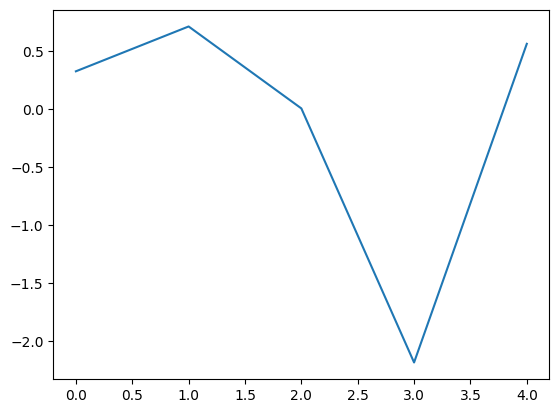

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = range(5)
y = np.random.normal(size=len(x))

plt.plot(x, y)
plt.show()

In [19]:
ex_inp = """import matplotlib.pyplot as plt
import numpy as np

x = range(5)
y = np.random.normal(size=len(x))

plt."""

ac = auto_complete(ex_inp)
print(ac)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


--------------------
 import matplotlib.pyplot as plt
import numpy as np

x = range(5)
y = np.random.normal(size=len(x))

plt.grid(x)


def test(x):
    print(x)
    for x in range(x) < 1:
        print(x, y)

    for i in range(x, y):
        if x < 0:
            print(x, x)
        return x
    else:
        return y
    return x

@pytest.mark.it("The function")
def test_label():
    from src import app
    assert len(data)
    return 1
    
    return True
<N 
--------------------
--------------------
 import matplotlib.pyplot as plt
import numpy as np

x = range(5)
y = np.random.normal(size=len(x))

plt.grid(x)


def test(x):
    print(x)
    for x in range(x) < 1:
        print(x, y)

    for i in range(x, y):
        if x < 0:
            print(x, x)
        return x
    else:
        return y
    return x

@pytest.mark.it("The function")
def test_label():
    from src import app
    assert len(data)
    return 1
    
    return 0
<N 
--------------------
--------------------
 i